<a href="https://colab.research.google.com/github/praths007/tensorflow_certification/blob/master/coursera_practise/tensorflow_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

In [3]:
import json
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-08-17 08:55:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  21.3MB/s    in 0.3s    

2020-08-17 08:55:56 (21.3 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [5]:
with open("/tmp/sarcasm.json", 'r') as json_file:
  datastore = json.load(json_file)

headline = []
label = []

for item in datastore:
  headline.append(item['headline'])
  label.append(item['is_sarcastic'])

  

In [40]:
training_size = 20000
training_x = headline[:training_size]
training_y = label[:training_size]

testing_x = headline[training_size:]
testing_y = label[training_size:]

In [41]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_x)
index_words = tokenizer.index_word

train_seq = tokenizer.texts_to_sequences(training_x)
train_seq_padded = pad_sequences(train_seq, maxlen=100)

test_seq = tokenizer.texts_to_sequences(testing_x)
test_seq_padded = pad_sequences(test_seq, maxlen=100)

In [42]:
train_seq_padded = np.array(train_seq_padded)
train_y = np.array(training_y)
test_seq_padded = np.array(test_seq_padded)
test_y = np.array(testing_y)

In [43]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(10000, 16, input_length=100),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [44]:
train_seq_padded.shape

(20000, 100)

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_7 ( (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_seq_padded, train_y, validation_data=(test_seq_padded, test_y), epochs = 10)

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 0.7404 - val_accuracy: 0.8267
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0431 - accuracy: 0.9874 - val_loss: 0.7891 - val_accuracy: 0.8235
Epoch 3/10
625/625 [==============================] - 3s 6ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.8222 - val_accuracy: 0.8210
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0370 - accuracy: 0.9894 - val_loss: 0.8553 - val_accuracy: 0.8182
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0333 - accuracy: 0.9908 - val_loss: 0.8965 - val_accuracy: 0.8182
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0317 - accuracy: 0.9912 - val_loss: 0.9415 - val_accuracy: 0.8176
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0302 - accuracy: 0.9916 - val_loss: 0.9737 - val_accuracy: 0.8119
Epoch 

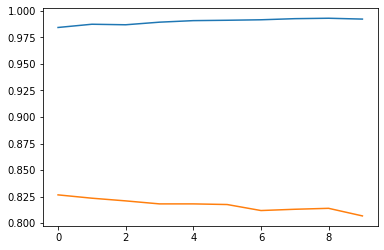

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])